In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#엑셀파일 읽어 오기
fp = pd.read_excel("fp.xlsx",header=1)
ep = pd.read_excel("ep.xlsx",header=1)

In [3]:
fp.head()

,기간,원자력,유연탄,무연탄,유류,LNG,원자력.1,유연탄.1,무연탄.1,유류.1,LNG.1,원자력.2,유연탄.2,무연탄.2,유류.2,LNG.2
0,2023/02,6.360,293231.499,198334.083,1282790.000,1979548.670,2560.790,54110.050,41857.5,140279.322,151816.526,6.360,120.412,105.981,331.060,266.344
1,2023/01,6.360,306051.518,209345.089,1468224.580,1918688.304,2559.286,56891.443,47125.5,160489.946,147230.182,6.360,126.430,119.319,379.015,258.667
2,2022/12,6.368,328455.927,209214.252,1477537.510,1976708.988,2566.794,61854.066,44311.5,161972.124,151718.183,6.368,137.572,112.194,381.051,266.790
3,2022/11,6.370,295558.650,201385.222,1452600.455,1998426.807,2567.882,56400.131,43587.0,159000.565,153802.183,6.370,125.277,110.359,373.958,270.375
4,2022/10,6.367,305296.466,168023.211,1520785.049,1975472.425,2566.785,57603.469,47613.5,165930.149,151874.832,6.367,127.965,120.554,390.623,267.254


In [4]:
ep.head()

,기간,육지,제주,통합,Unnamed: 4
0,2023/02,253.48,260.27,253.56,0.0
1,2023/01,240.73,247.55,240.81,0.0
2,2022/12,267.55,275.15,267.63,0.0
3,2022/11,242.17,243.97,242.19,0.0
4,2022/10,251.61,255.03,251.65,0.0


In [5]:
print(fp.info())
print(ep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      263 non-null    object 
 1   원자력     263 non-null    float64
 2   유연탄     263 non-null    float64
 3   무연탄     263 non-null    float64
 4   유류      263 non-null    float64
 5   LNG     263 non-null    float64
 6   원자력.1   263 non-null    float64
 7   유연탄.1   263 non-null    float64
 8   무연탄.1   263 non-null    float64
 9   유류.1    263 non-null    float64
 10  LNG.1   263 non-null    float64
 11  원자력.2   263 non-null    float64
 12  유연탄.2   263 non-null    float64
 13  무연탄.2   263 non-null    float64
 14  유류.2    263 non-null    float64
 15  LNG.2   263 non-null    float64
dtypes: float64(15), object(1)
memory usage: 33.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------

In [6]:

#fp 열 제거
fp = fp.drop(columns=['기간','원자력','유연탄','무연탄','유류','LNG','원자력.1','유연탄.1','무연탄.1','유류.1','LNG.1'])

# ep 열 제거
ep = ep.drop(columns=['기간','육지','제주','Unnamed: 4'])

In [7]:
print(fp.info())
print(ep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   원자력.2   263 non-null    float64
 1   유연탄.2   263 non-null    float64
 2   무연탄.2   263 non-null    float64
 3   유류.2    263 non-null    float64
 4   LNG.2   263 non-null    float64
dtypes: float64(5)
memory usage: 10.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   통합      263 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB
None


In [8]:
fp.head()

,원자력.2,유연탄.2,무연탄.2,유류.2,LNG.2
0,6.360,120.412,105.981,331.060,266.344
1,6.360,126.430,119.319,379.015,258.667
2,6.368,137.572,112.194,381.051,266.790
3,6.370,125.277,110.359,373.958,270.375
4,6.367,127.965,120.554,390.623,267.254


In [9]:
ep.head()

,통합
0,253.56
1,240.81
2,267.63
3,242.19
4,251.65


In [10]:
train_input, test_input, train_target, test_target = train_test_split(fp, ep, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5,include_bias=False)

poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(210, 251)


In [12]:
#선형 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.999994295773063
-1336292120.6715884


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled,train_target))

print(ridge.score(test_scaled,test_target))


0.9760285106553324
-0.09075654786382747


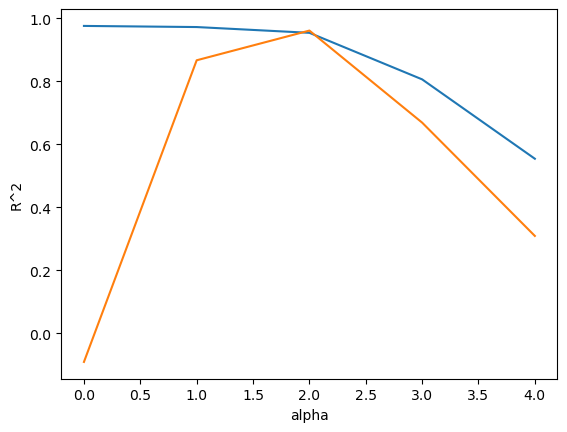

In [15]:
alpha_list = [ 1,10,100,1000,10000]
train_score=[]
test_score=[]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled,test_target))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [16]:
ridge = Ridge(alpha = 100)
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled,test_target))


0.954129573097824
0.9612471473726204


In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled,test_target))

0.96674701976974
0.9716419713197966
